In [0]:
import pandas as pd
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
#import statsmodels.api as sm

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
dataset = pd.read_csv('/content/gdrive/My Drive/Dataset/HT_Sensor_dataset.dat',sep = '  ',engine='python')
dataset.head()

,id time,Unnamed: 1,Unnamed: 2,R1,Unnamed: 4,Unnamed: 5,Unnamed: 6,R2,Unnamed: 8,Unnamed: 9,...,Unnamed: 29,Unnamed: 30,R8,Unnamed: 32,Unnamed: 33,Unnamed: 34,Temp.,Unnamed: 36,Unnamed: 37,Humidity
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
cols = [12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]
dataset.drop(dataset.columns[cols],axis=1,inplace=True)
dataset.head()

,id time,Unnamed: 1,Unnamed: 2,R1,Unnamed: 4,Unnamed: 5,Unnamed: 6,R2,Unnamed: 8,Unnamed: 9,Unnamed: 10,R3
0,0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
1,0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
2,0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
3,0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
4,0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [0]:
dataset.columns = ['id','time','R1','R2','R3','R4','R5','R6','R7','R8','Temp.','Humidity'] 
dataset.set_index('id',inplace = True)
dataset.head()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity
id,,,,,,,,,,,
0,-0.999750,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528
0,-0.999472,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299
0,-0.999194,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093
0,-0.998916,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905
0,-0.998627,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736


In [0]:
output = pd.read_csv('/content/gdrive/My Drive/Dataset/HT_Sensor_metadata.dat',sep = '\t')
# output.columns = ['id','date','class','t0','dt']
output.head()

,id,date,Unnamed: 2,class,t0,dt
0,0,07-04-15,banana,13.49,1.64,NaN
1,1,07-05-15,wine,19.61,0.54,NaN
2,2,07-06-15,wine,19.99,0.66,NaN
3,3,07-09-15,banana,6.49,0.72,NaN
4,4,07-09-15,wine,20.07,0.53,NaN


In [0]:
cols = [5]
output.drop(output.columns[cols],axis=1,inplace=True)
output.head()
# output.columns = ['id','date','class','t0','dt']

,id,date,Unnamed: 2,class,t0
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [0]:
output.columns = ['id','date','class','t0','dt']
output.head()

,id,date,class,t0,dt
0,0,07-04-15,banana,13.49,1.64
1,1,07-05-15,wine,19.61,0.54
2,2,07-06-15,wine,19.99,0.66
3,3,07-09-15,banana,6.49,0.72
4,4,07-09-15,wine,20.07,0.53


In [0]:
output["class"].unique()

array(['banana', 'wine', 'background'], dtype=object)

In [0]:
dataset = dataset.join(output,how = 'inner')
dataset.set_index(np.arange(dataset.shape[0]),inplace = True)
dataset['time']  += dataset['t0']
dataset.drop(['t0'],axis = 1,inplace=True)
dataset.head()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id,date,class,dt
0,12.490250,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,0,07-04-15,banana,1.64
1,12.490528,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,0,07-04-15,banana,1.64
2,12.490806,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,0,07-04-15,banana,1.64
3,12.491084,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,0,07-04-15,banana,1.64
4,12.491373,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,0,07-04-15,banana,1.64


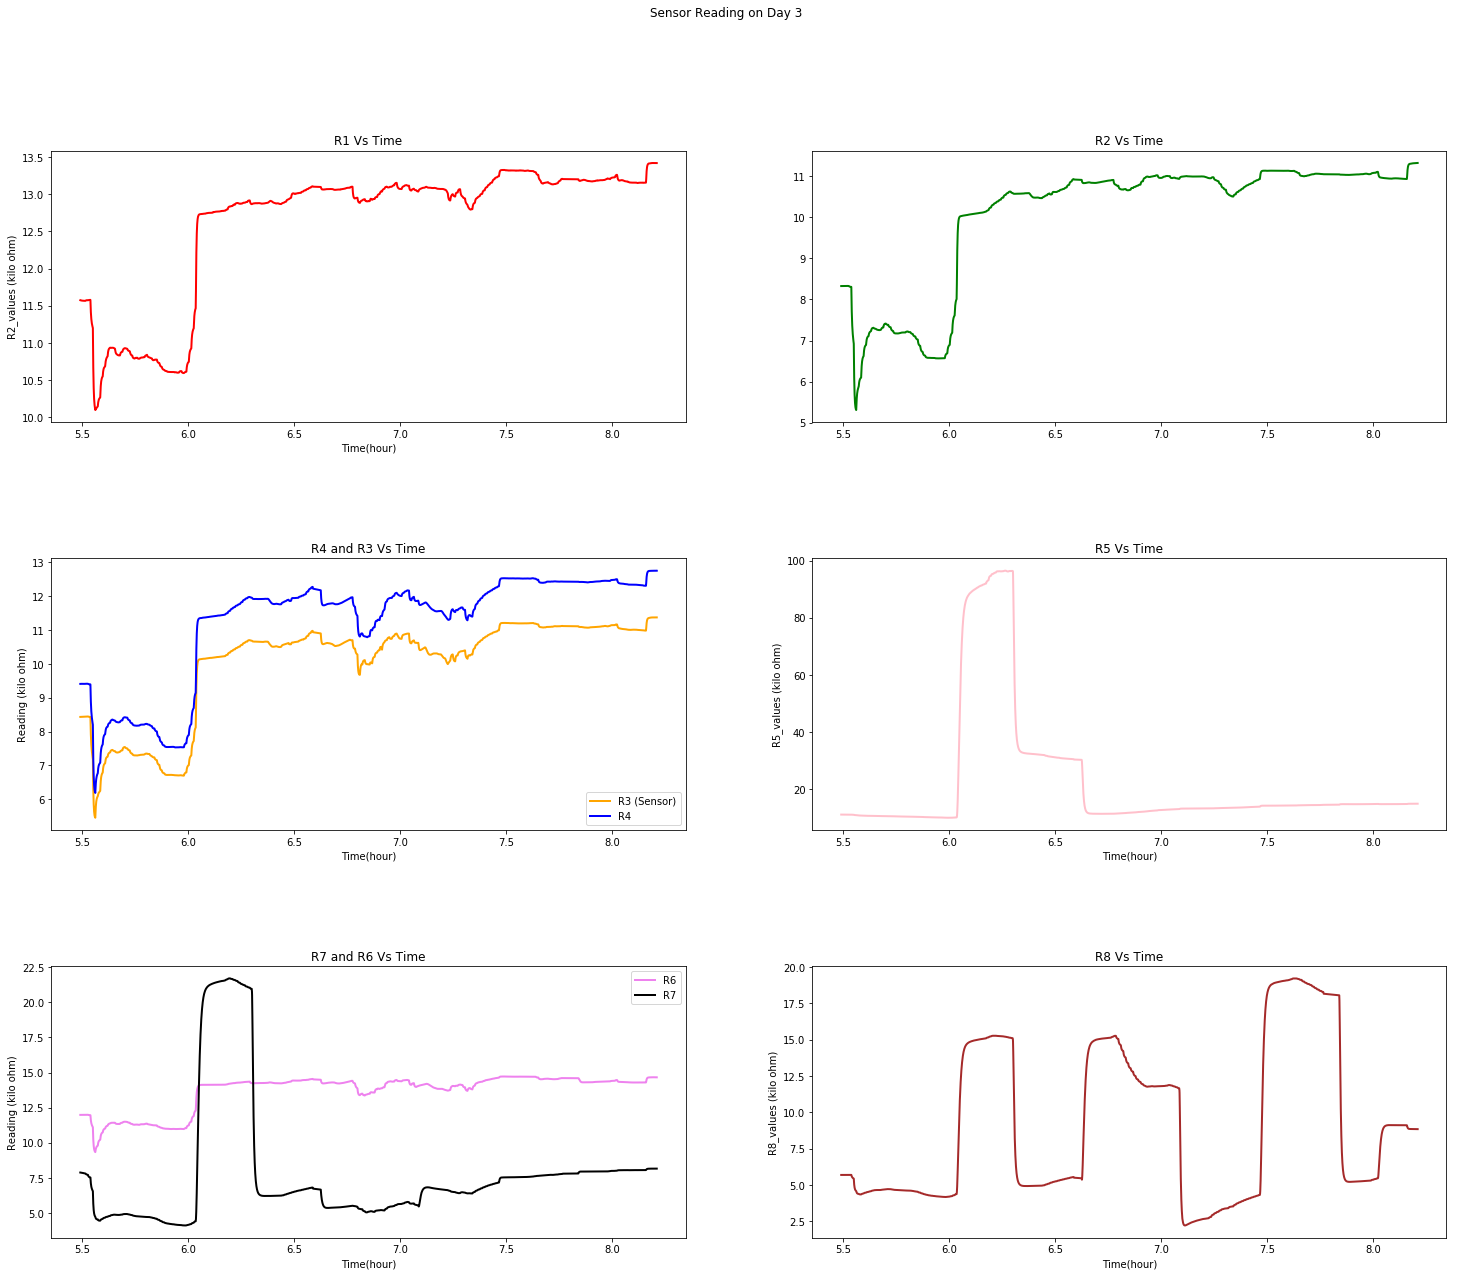

In [0]:
fig, axes = plt.subplots(nrows=3, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(25)
fig.subplots_adjust(hspace=.5)

axes[0,0].plot(dataset.time[dataset.id == 3],dataset.R1[dataset.id == 3],c = 'red',linewidth = '2.0')
axes[0,0].set_title('R1 Vs Time')
axes[0,0].set_xlabel('Time(hour)')
axes[0,0].set_ylabel('R1_values(kilo ohm)')

axes[0,1].plot(dataset.time[dataset.id == 3],dataset.R2[dataset.id == 3],c = 'green',linewidth = '2.0')
axes[0,1].set_title('R2 Vs Time')
axes[0,0].set_xlabel('Time(hour)')
axes[0,0].set_ylabel('R2_values (kilo ohm)')


axes[1,0].plot(dataset.time[dataset.id == 3],dataset.R3[dataset.id == 3],c = 'orange',linewidth = '2.0',label = 'R3 (Sensor)')
#axes[1,0].set_title('R3 Vs Time')
axes[1,0].set_xlabel('Time(hour)')
axes[1,0].set_ylabel('R3_values (kilo ohm)')


axes[1,0].plot(dataset.time[dataset.id == 3],dataset.R4[dataset.id == 3],c = 'blue',linewidth = '2.0',label = 'R4')
axes[1,0].set_title('R4 and R3 Vs Time')
axes[1,0].set_xlabel('Time(hour)')
axes[1,0].set_ylabel('Reading (kilo ohm)')
axes[1,0].legend(loc = 4)

axes[1,1].plot(dataset.time[dataset.id == 3],dataset.R5[dataset.id == 3],c = 'pink',linewidth = '2.0')
axes[1,1].set_title('R5 Vs Time')
axes[1,1].set_xlabel('Time(hour)')
axes[1,1].set_ylabel('R5_values (kilo ohm)')
 

axes[2,0].plot(dataset.time[dataset.id == 3],dataset.R6[dataset.id == 3],c = 'violet',linewidth = '2.0',label = 'R6')
#axes[2,0].set_title('R6 Vs Time')
axes[2,0].set_xlabel('Time(hour)')
axes[2,0].set_ylabel('R6_values (kilo ohm)')


axes[2,0].plot(dataset.time[dataset.id == 3],dataset.R7[dataset.id == 3],c = 'black',linewidth = '2.0',label ='R7')
axes[2,0].set_title('R7 and R6 Vs Time')
axes[2,0].set_xlabel('Time(hour)')
axes[2,0].set_ylabel('Reading (kilo ohm)')
axes[2,0].legend()

axes[2,1].plot(dataset.time[dataset.id == 3],dataset.R8[dataset.id == 3],c = 'brown',linewidth = '2.0')
axes[2,1].set_title('R8 Vs Time')
axes[2,1].set_xlabel('Time(hour)')
axes[2,1].set_ylabel('R8_values (kilo ohm)')
plt.suptitle('Sensor Reading on Day 3')
pl.savefig("Graph1.png", dpi=300)

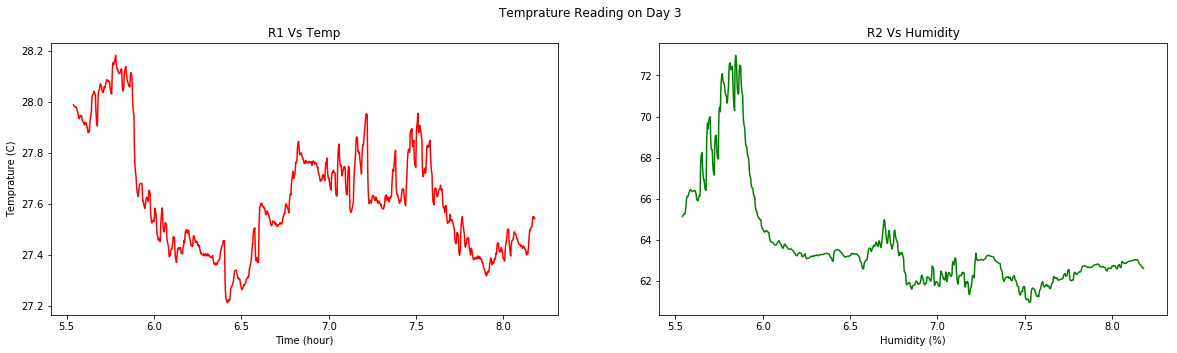

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2)#, sharex=True, sharey=True)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(hspace=.5)

axes[0].plot(dataset.time[dataset.id == 17],dataset['Temp.'][dataset.id == 17],c = 'r')
axes[0].set_title('R1 Vs Temp')
axes[0].set_xlabel('Time (hour)')
axes[0].set_ylabel('Temprature (C)')
axes[1].plot(dataset.time[dataset.id == 17],dataset.Humidity[dataset.id == 17],c = 'green')
axes[1].set_title('R2 Vs Humidity')
axes[1].set_xlabel('Humidity (%)')
plt.suptitle('Temprature Reading on Day 3')
pl.savefig("Graph2.png", dpi=300)

In [0]:
dataset = dataset.drop(['date','dt'], axis=1)
dataset.head()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id,class
0,12.490250,12.8621,10.3683,10.4383,11.6699,13.4931,13.3423,8.04169,8.73901,26.2257,59.0528,0,banana
1,12.490528,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,0,banana
2,12.490806,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,0,banana
3,12.491084,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,0,banana
4,12.491373,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,0,banana


In [0]:
dataset.corr()

,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id
time,1.000000,0.076205,0.149682,0.132345,0.168753,-0.093362,0.019509,0.037833,0.023120,-0.062172,-0.290118,0.101273
R1,0.076205,1.000000,0.829782,0.830017,0.815452,0.023163,0.179294,0.261193,0.210106,-0.061570,-0.197800,0.049594
R2,0.149682,0.829782,1.000000,0.904101,0.970727,0.000083,0.179965,0.251888,0.212323,-0.071798,-0.197358,0.118749
R3,0.132345,0.830017,0.904101,1.000000,0.938719,0.011904,0.230779,0.300779,0.247322,-0.005071,-0.164143,0.196694
R4,0.168753,0.815452,0.970727,0.938719,1.000000,-0.001982,0.201893,0.269640,0.222034,-0.054750,-0.211453,0.152847
R5,-0.093362,0.023163,0.000083,0.011904,-0.001982,1.000000,0.117357,0.184570,0.329771,-0.067408,0.001222,-0.061231
R6,0.019509,0.179294,0.179965,0.230779,0.201893,0.117357,1.000000,0.232124,0.237968,-0.085537,-0.009581,0.334091
R7,0.037833,0.261193,0.251888,0.300779,0.269640,0.184570,0.232124,1.000000,0.763631,-0.009134,-0.020658,0.098402
R8,0.023120,0.210106,0.212323,0.247322,0.222034,0.329771,0.237968,0.763631,1.000000,0.000779,0.016815,0.064075
Temp.,-0.062172,-0.061570,-0.071798,-0.005071,-0.054750,-0.067408,-0.085537,-0.009134,0.000779,1.000000,0.213209,0.223035


In [0]:
dataset.corr() > 0.98


,time,R1,R2,R3,R4,R5,R6,R7,R8,Temp.,Humidity,id
time,True,False,False,False,False,False,False,False,False,False,False,False
R1,False,True,False,False,False,False,False,False,False,False,False,False
R2,False,False,True,False,False,False,False,False,False,False,False,False
R3,False,False,False,True,False,False,False,False,False,False,False,False
R4,False,False,False,False,True,False,False,False,False,False,False,False
R5,False,False,False,False,False,True,False,False,False,False,False,False
R6,False,False,False,False,False,False,True,False,False,False,False,False
R7,False,False,False,False,False,False,False,True,False,False,False,False
R8,False,False,False,False,False,False,False,False,True,False,False,False
Temp.,False,False,False,False,False,False,False,False,False,True,False,False


In [0]:
X = dataset.drop('class', axis=1)  
y = dataset['class'] 


In [0]:
X = X.drop('id', axis=1)


In [0]:
y= y.values.reshape(-1, 1)

In [0]:

# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(y)
# y=le.transform(y)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
y = ohe.fit_transform(y)


In [0]:
#  X = pd.DataFrame(X).sample(frac=1).reset_index(drop=True).values
#  y = pd.DataFrame(y).sample(frac=1).reset_index(drop=True).values

In [0]:
# y = y.reshape(-1,)

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,random_state=42, test_size=0.2)
# size = int(len(X)*0.9)
# Xtrain = X[:size]
# Xtest = X[size:]
# ytrain = y[:size]
# ytest = y[size:]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
Xtest = sc.transform(Xtest)

In [0]:
# #Import Random Forest Model
# from sklearn.ensemble import RandomForestClassifier

# #Create a Gaussian Classifier
# clf=RandomForestClassifier(n_estimators=50)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# clf.fit(Xtrain,ytrain)

# y_pred=clf.predict(Xtest)

# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(ytest, y_pred))

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

classifier = Sequential()

# # classifier.add(LSTM(4, input_shape=(1, len(Xtrain[0]))))

# Adding First Input Layer and Hidden Layer 
classifier.add(Dense(output_dim =3, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding Seocnd Hidden Layer 
classifier.add(Dense(output_dim =6, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(output_dim =4, init = 'uniform', activation = 'tanh'))
classifier.add(Dense(output_dim =3, init = 'uniform', activation = 'tanh'))
#Adding Output Layer
classifier.add(Dense(output_dim =3, init = 'uniform', activation = 'softmax'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=3, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=6, kernel_initializer="uniform")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=4, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="tanh", units=3, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Dense` call to the Kera

In [0]:
# Compiling the ANN
# from keras.optimizers import SGD
# opt = SGD(lr=0.0001)
# model.compile(loss = "categorical_crossentropy", optimizer = opt)
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# Fitting the ANN to the Training Set

# classifier.fit(Xtrain, ytrain, batch_size = 50, nb_epoch = 10)
classifier.fit(Xtrain, ytrain, batch_size = 50, epochs = 100)

Epoch 1/100
743192/743192 [==============================] - 18s 24us/step - loss: 0.3695 - acc: 0.8170
Epoch 2/100
743192/743192 [==============================] - 17s 24us/step - loss: 0.3701 - acc: 0.8171
Epoch 3/100
743192/743192 [==============================] - 17s 23us/step - loss: 0.3695 - acc: 0.8172
Epoch 4/100
743192/743192 [==============================] - 17s 23us/step - loss: 0.3697 - acc: 0.8170
Epoch 5/100
743192/743192 [==============================] - 18s 24us/step - loss: 0.3702 - acc: 0.8168
Epoch 6/100
743192/743192 [==============================] - 18s 24us/step - loss: 0.3694 - acc: 0.8174
Epoch 7/100
743192/743192 [==============================] - 18s 24us/step - loss: 0.3695 - acc: 0.8173
Epoch 8/100
743192/743192 [==============================] - 18s 24us/step - loss: 0.3695 - acc: 0.8172
Epoch 9/100
743192/743192 [==============================] - 18s 24us/step - loss: 0.3696 - acc: 0.8168
Epoch 10/100
743192/743192 [==============================] - 18

In [0]:
#Predicting the Test Set results
y_pred = classifier.predict(Xtest)
y_pred = np.argmax(y_pred, axis = 1)
y_rev = np.argmax(ytest, axis = 1)

#y_pred = [[1.0 if k >=3.5 else 0.0 for k in t] for t in y_pred]
print(y_pred)
print(y_rev)


[0 1 1 ... 2 1 1]
[0 1 1 ... 2 1 2]


In [0]:
print(len(y_pred))

185799


[[54449    76   801]
 [  702 51628  8815]
 [ 4717 18287 46324]]


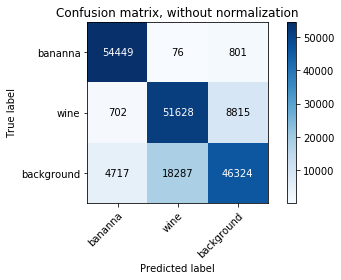

0.8202466105845564


In [0]:
from sklearn.utils.multiclass import unique_labels
class_names = ['bananna', 'wine','background']
def plot_confusion_matrix(y_rev, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_rev, y_pred)
    # Only use the labels that appear in the date
  

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=class_names, yticklabels=class_names,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_rev, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')


plt.show()
print(accuracy_score(y_rev,y_pred))

In [0]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# logreg.fit(Xtrain, ytrain)
# print('Accuracy of Logistic regression classifier on training set: {:.2f}'
#      .format(logreg.score(Xtrain, ytrain)))
# print('Accuracy of Logistic regression classifier on test set: {:.2f}'
#      .format(logreg.score(Xtest, ytest)))

In [0]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# pred = logreg.predict(Xtest)
# print(confusion_matrix(ytest, pred))
# print(classification_report(ytest, pred))

In [0]:
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier().fit(Xtrain, ytrain)
# print('Accuracy of Decision Tree classifier on training set: {:.2f}'
#      .format(clf.score(Xtrain, ytrain)))
# print('Accuracy of Decision Tree classifier on test set: {:.2f}'
#      .format(clf.score(Xtest, ytest)))


In [0]:

# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier()
# knn.fit(Xtrain, ytrain)
# print('Accuracy of K-NN classifier on training set: {:.2f}'
#      .format(knn.score(Xtrain, ytrain)))
# print('Accuracy of K-NN classifier on test set: {:.2f}'
#      .format(knn.score(Xtest, ytest)))

In [0]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# pred = knn.predict(Xtest)
# print(confusion_matrix(ytest, pred))
# print(classification_report(ytest, pred))

In [0]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda = LinearDiscriminantAnalysis()
# lda.fit(Xtrain, ytrain)
# print('Accuracy of LDA classifier on training set: {:.2f}'
#      .format(lda.score(Xtrain, ytrain)))
# print('Accuracy of LDA classifier on test set: {:.2f}'
#      .format(lda.score(Xtest, ytest)))

In [0]:
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# pred = lda.predict(Xtest)
# print(confusion_matrix(ytest, pred))
# print(classification_report(ytest, pred))

In [0]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(Xtrain, ytrain)
# print('Accuracy of GNB classifier on training set: {:.2f}'
#      .format(gnb.score(Xtrain, ytrain)))
# print('Accuracy of GNB classifier on test set: {:.2f}'
#      .format(gnb.score(Xtest, ytest)))

In [0]:
# from sklearn.svm import SVC
# svm = SVC(kernel = 'linear', random_state = 42)
# svm.fit(Xtrain, ytrain)
# print('Accuracy of SVM classifier on training set: {:.2f}'
#      .format(svm.score(Xtrain, ytrain)))
# print('Accuracy of SVM classifier on test set: {:.2f}'
#      .format(svm.score(Xtest, ytest)))